In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# 1.데이터 준비 
# csv 파일을 읽어와서 데이터프레임으로 변환

df = pd.read_csv('../data/auto-mpg.csv', header=None)
print(df)

0  1      2      3       4     5   6  7                          8
0    18.0  8  307.0  130.0  3504.0  12.0  70  1  chevrolet chevelle malibu
1    15.0  8  350.0  165.0  3693.0  11.5  70  1          buick skylark 320
2    18.0  8  318.0  150.0  3436.0  11.0  70  1         plymouth satellite
3    16.0  8  304.0  150.0  3433.0  12.0  70  1              amc rebel sst
4    17.0  8  302.0  140.0  3449.0  10.5  70  1                ford torino
..    ... ..    ...    ...     ...   ...  .. ..                        ...
393  27.0  4  140.0  86.00  2790.0  15.6  82  1            ford mustang gl
394  44.0  4   97.0  52.00  2130.0  24.6  82  2                  vw pickup
395  32.0  4  135.0  84.00  2295.0  11.6  82  1              dodge rampage
396  28.0  4  120.0  79.00  2625.0  18.6  82  1                ford ranger
397  31.0  4  119.0  82.00  2720.0  19.4  82  1                 chevy s-10

[398 rows x 9 columns]


In [56]:
# 컬럼명 설정 
df.columns =  ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name'] 

In [57]:
# 데이터 살펴보기
print(df.head())

mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [58]:
# IPython 디스플레이 설정 - 출력할 열의 개수 늘리기
pd.set_option('display.max_columns', 10)
print(df.head()) 

mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [59]:
# 2. 데이터 탐색

In [60]:
# 데이터 자료형 살펴 보기 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null float64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
name            398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [61]:
# 데이터 통계 요약정보 확인
print(df.describe())

mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000      8.000000   
25%     17.500000    4.000000    104.250000  2223.750000     13.825000   
50%     23.000000    4.000000    148.500000  2803.500000     15.500000   
75%     29.000000    8.000000    262.000000  3608.000000     17.175000   
max     46.600000    8.000000    455.000000  5140.000000     24.800000   

       model year      origin  
count  398.000000  398.000000  
mean    76.010050    1.572864  
std      3.697627    0.802055  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000  


In [62]:
# horsepower 열의 고유값 확인 : ['130.0' '165.0' '150.0' '140.0' ...]
print(df['horsepower'].unique()) 
# horsepower 열의 고유값 확인
# horsepower 열의 자료형 object(문자형)

['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' '?' '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' '158.0'
 '167.0' '94.00' '107.0' '230.0' '49.00' '75.00' '91.00' '122.0' '67.00'
 '83.00' '78.00' '52.00' '61.00' '93.00' '148.0' '129.0' '96.00' '71.00'
 '98.00' '115.0' '53.00' '81.00' '79.00' '120.0' '152.0' '102.0' '108.0'
 '68.00' '58.00' '149.0' '89.00' '63.00' '48.00' '66.00' '139.0' '103.0'
 '125.0' '133.0' '138.0' '135.0' '142.0' '77.00' '62.00' '132.0' '84.00'
 '64.00' '74.00' '116.0' '82.00']


In [63]:
# horsepower 열의 자료형 변경 (문자형 ->실수형)
df['horsepower'].replace('?', np.nan, inplace=True)     # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)  # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')     # 문자형을 실수형으로 변홖
print(df.describe())    
# 문자형에서 실수형으로 변환된 horsepower컬럼 출력됨

mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model year      origin  
count    392.000000  392.000000  392.000000  
mean      15.541327   75.979592    1.576531  
std        2.758864    3.683737    0.805518  
min        8.000000   70.000000    1.000000  
25%       13.775000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.025000   79.000000    2.000000

In [64]:
# 3. 분석에 활용할 속성(feature 또는 variable) 선택 및 그래프 그리기

In [65]:
# 분석에 활용한 열(속성)을 선택 (연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
print(ndf.head()) # 앞에서 5개의 데이터 출력

mpg  cylinders  horsepower  weight
0  18.0          8       130.0  3504.0
1  15.0          8       165.0  3693.0
2  18.0          8       150.0  3436.0
3  16.0          8       150.0  3433.0
4  17.0          8       140.0  3449.0


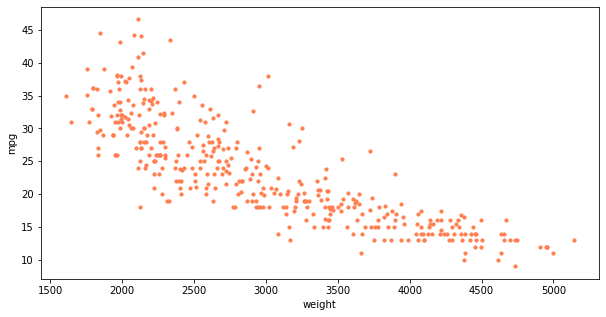

In [66]:
# 독립변수(x) weight(중량)와 종속 변수(y)인 mpg(연비) 간의 선형관계를 산점도 그래프로 확인
# 1.matplotlib으로 산점도 그리기
ndf.plot(kind='scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10, 5))
plt.show()

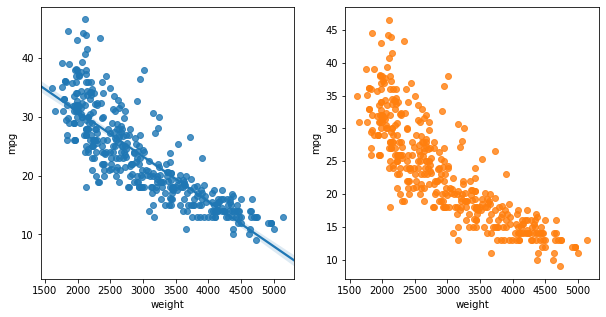

In [67]:
# 2.seaborn으로 산점도 그리기
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1) # 1행 2열 첫번째 그래프
ax2 = fig.add_subplot(1, 2, 2) # 1행 2열 두번째 그래프
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax1, fit_reg=True)    # 회귀선 표시
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax2, fit_reg=False)   # 회귀선 미표시
plt.show()

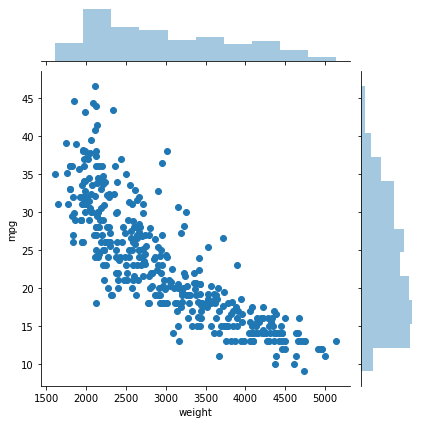

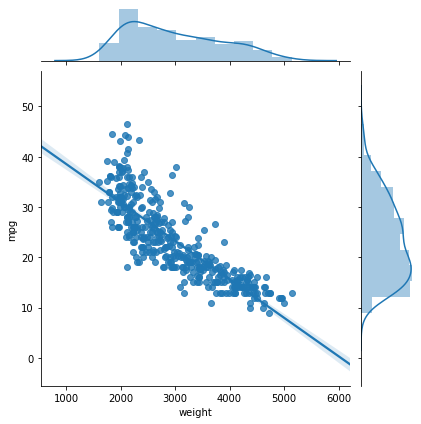

In [68]:
# 3.seaborn 조인트 그래프 - 산점도, 히스토그램
sns.jointplot(x='weight', y='mpg', data=ndf)                # 회귀선 없음
sns.jointplot(x='weight', y='mpg', kind='reg', data=ndf)    # 회귀선 표시
plt.show()

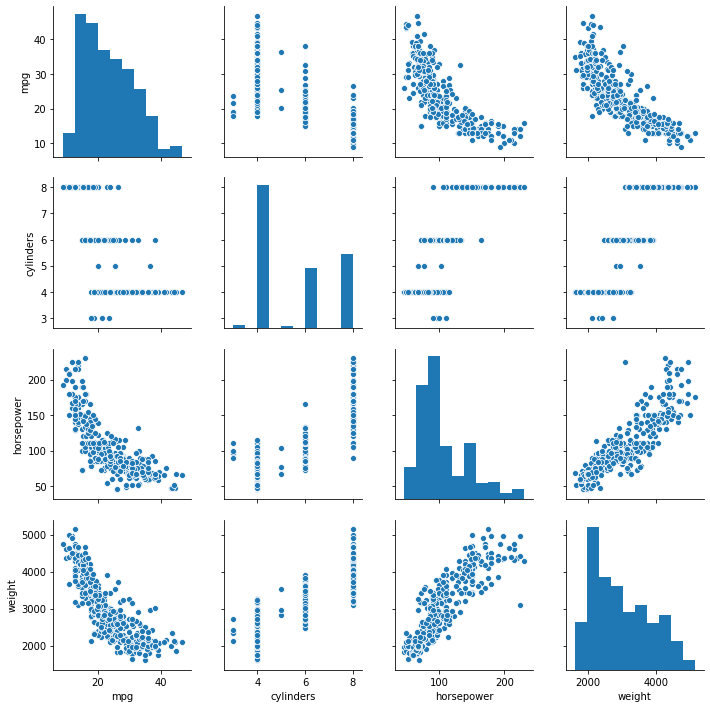

In [69]:
# 4.seaborn pariplot으로 두 변수 간의 모든 경우의 수 그리기
sns.pairplot(ndf)
plt.show()

In [70]:
# 분석에 홗용핛 열(속성)을 선택 (연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
print(ndf.head()) 

mpg  cylinders  horsepower  weight
0  18.0          8       130.0  3504.0
1  15.0          8       165.0  3693.0
2  18.0          8       150.0  3436.0
3  16.0          8       150.0  3433.0
4  17.0          8       140.0  3449.0


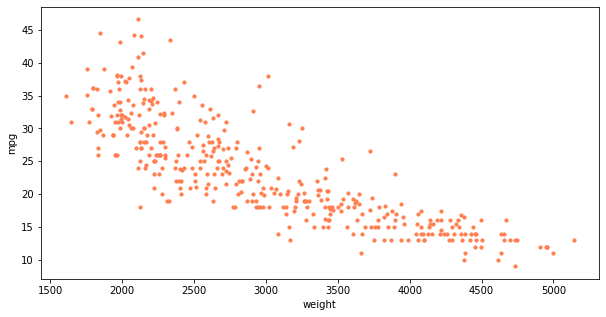

In [71]:
# 독립변수(x) weight(중량)와 종속 변수(y)인 mpg(연비) 간의 선형관계를 산점도 그래프
# 1.matplotlib으로 산점도 그리기
ndf.plot(kind='scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10, 5))
plt.show()
# weight(중량)이 적을수록 mpg(연비)가 높은 것을 알 수 있다.

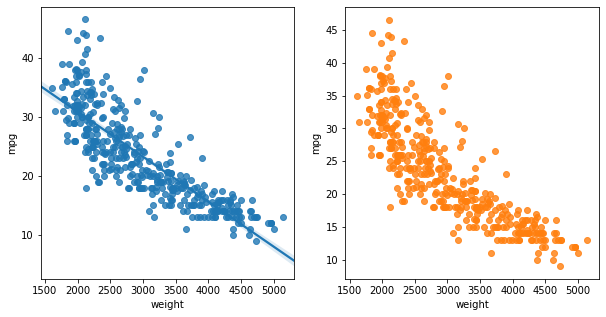

In [72]:
# 2.seaborn으로 산점도 그리기
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1) # 1행 2열 첫번째 그래프
ax2 = fig.add_subplot(1, 2, 2) # 1행 2열 두번째 그래프
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax1, fit_reg=True)  # 회귀선 표시
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax2, fit_reg=False) # 회귀선 미표시
plt.show()

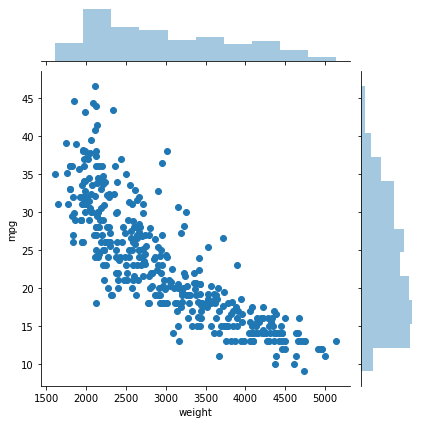

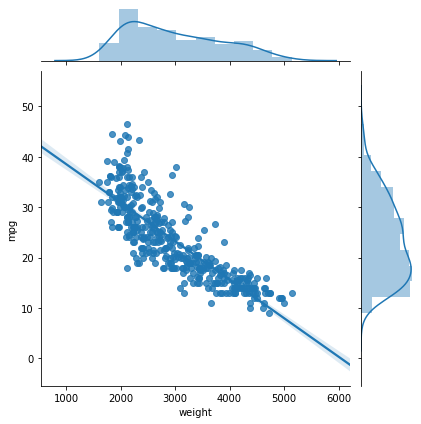

In [73]:
# 3.seaborn 조인트 그래프 - 산점도, 히스토그램
sns.jointplot(x='weight', y='mpg', data=ndf)                # 회귀선 없음
sns.jointplot(x='weight', y='mpg', kind='reg', data=ndf)    # 회귀선 표시
plt.show()

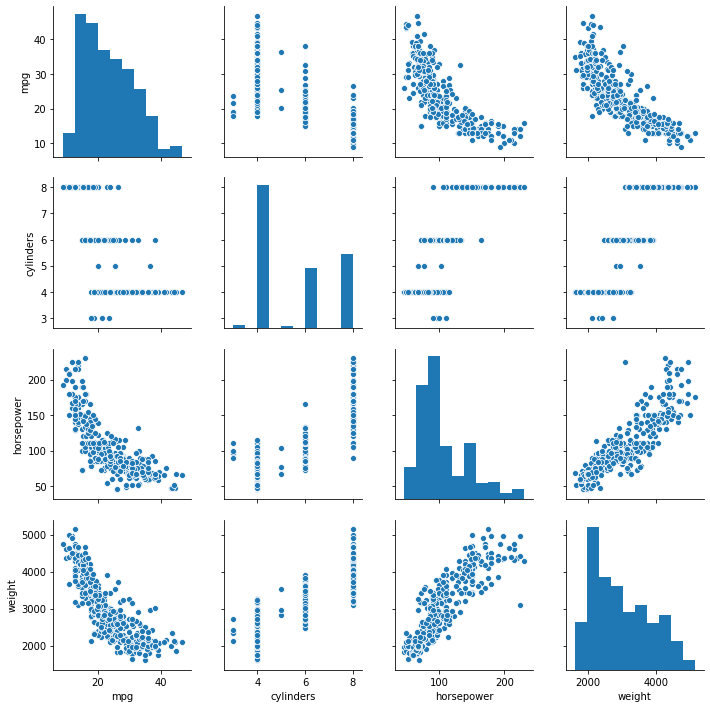

In [74]:
# 4.seaborn pariplot으로 두 변수 간의 모든 경우의 수 그리기
sns.pairplot(ndf)
plt.show()
# 같은 변수끼리 짝을 이루는 대각선 방향은 히스토그램을 그리고 서로 다른 변수간에는 산점도로 출력된다.

In [75]:
# 4. 훈련 데이터 / 검증 데이터 분할

In [76]:
# 앞에서 그린 산점도에서 ‘mpg’ 열과 선형관계를 보이는 ‘weight’ 열을 독립변수 x로 선택핚다.
# 다음은 두 변수 갂의 회귀 방정식을 구하기 위해서 훈련 데이터와 검증 데이터로 나눠서 모델을 구축한다.
# 다음 예제에서는 ‘weight’ 열을 독립 변수 x로 선택하고, 데이터를 7:3 으로 각각분할한다.
# 훈련 데이터 274개, 검증 데이터 118개로 분할한다.

# weight – 독립변수(x)
# mpg – 종속변수(y)

In [77]:
# 속성(변수) 선택
x=ndf[['weight']] # 독립 변수 : x
y=ndf['mpg'] # 종속 변수 : y
# train data 와 test data로 분할(7:3 비율)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, # 독립 변수
                                                    y, # 종속 변수
                                                    test_size=0.3, # 검증 30%
                                                    random_state=10) # 랜덤 추출 값
print('train data 개수: ', len(x_train))
print('test data 개수: ', len(x_test))

train data 개수:  274
test data 개수:  118


In [78]:
# 5. 모델 학습 및 모델 검증

In [79]:
# sklearn 라이브러리를 이용하여 선형회귀분석 모델을 만든다.
# LinearRegression() 함수로 회귀분석 모델 객체를 생성한다.
# 생성된 모델을 이용하여 학습 데이터(train data)를 학습 시키기 위해서는 fit() 함수를 사용한다.
# 모델 객체에 fit() 함수를 적용하고 훈련 데이터(x_train, y_train)를 전달하면 모델이 학습을 통해 회귀 방정식의 계수 a(기울기), b(절편)를 찾는다.
# 학습을 마친 모델의 예측 능력을 평가하기 위해서 검증 데이터를 score() 함수에 전달하여 모델의 결정계수(R-제곱)를 구한다.
# 결정 계수의 값이 1에 가까우면 모델의 예측 능력이 좋다고 평가한다

In [80]:
# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모델 객체 생성
lr = LinearRegression()

# train data를 가지고 모델 학습
lr.fit(x_train, y_train)

# 학습을 마친 모델에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(x_test, y_test)
print(r_square)

0.6822458558299322


기울기 a:  [-0.00775343]
y절편 b: 46.7103662572801


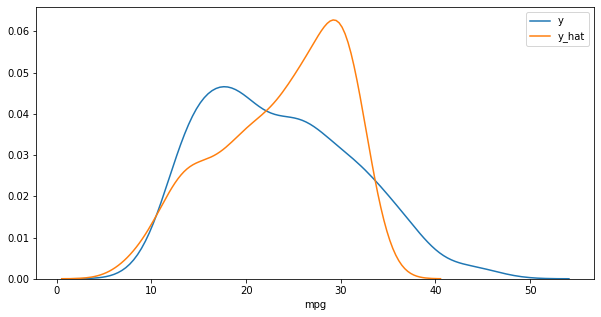

In [81]:
# 회귀식의 기울기
print('기울기 a: ', lr.coef_) # [-0.00775343]

# 회귀식의 y절편
print('y절편 b:', lr.intercept_) # 46.7103662572801


# 모델에 전체 x데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교
y_hat = lr.predict(x) # 예측값 구함
plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y, hist=False, label="y") # 실제 값
ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1) # 예측한 값
plt.show()

In [82]:
# <모델이 예측한 값(y_hat)와 실제 값(y) 비교 결과>
# 출력된 결과를 보면 실제 값은 왼쪽으로 편향되어 있고, 예측값은 반대로 오른쪽으로 편중되는 경향을 보인다. 
# 따라서 독립변수(weight)와 종속변수(mpg) 사이에 선형관계가 있지만, 모델의 오차를 더 줄일 필요가 있어 보인다.